In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
row, col = df.shape

In [8]:
df = np.array(df)
# convert our dataset into numpy array

In [9]:
#2000-42000 rows for training
train_data = df[2000:row].T
X_train = train_data[1:col]
y_train = train_data[0]

#first 1000 for test
test_data = df[:2000].T
X_test = test_data[1:col]
y_test = test_data[0]

In [10]:
X_train.shape

(784, 40000)

In [11]:
X_train[0]

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_train

array([3, 1, 6, ..., 7, 6, 9])

In [13]:
#activation functions

def ReLU(Z):
    return np.maximum(0,Z)

def derivation_ReLU(Z):
    return Z>0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

In [14]:
#forward prop.

def forward_prop(X,W1,B1,W2,B2):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

In [15]:
#one hot encoding

def one_hot(Y):
    return np.eye(Y.max() + 1)[Y]


In [16]:
#back prop

def back_prop(X, Y, Z1, Z2, A1, A2, W1, W2):

    m = X.shape[1]

    Y = one_hot(Y).T
    dL_dZ2 = A2 - Y
    dL_dW2 = 1/m * dL_dZ2.dot(A1.T)
    dL_dB2 = 1/m * np.sum(dL_dZ2, axis=1, keepdims=True)
    dL_dZ1 = (W2.T.dot(dL_dZ2)) * derivation_ReLU(Z1)
    dL_dW1 = 1/m * dL_dZ1.dot(X.T)
    dL_dB1 = 1/m * np.sum(dL_dZ1, axis=1, keepdims=True)

    return dL_dW1,dL_dB1,dL_dW2,dL_dB2

In [17]:
#we cant init params with jst 0
#if they are all zeroz then they learn same...

def initilize_params():

    np.random.seed(9)

    W1 = np.random.randn(64, 784) * np.sqrt(1. / 784)
    B1 = np.zeros((64, 1))

    W2 = np.random.randn(10, 64) * np.sqrt(1. / 64)
    B2 = np.zeros((10, 1))

    return W1, B1, W2, B2

In [18]:
#Update params

def update(W1, B1, W2, B2, dL_dW1, dL_dB1, dL_dW2, dL_dB2, alpha):
    W1 = W1 - alpha * dL_dW1 #alpha = learning rate
    B1 = B1 - alpha * dL_dB1

    W2 = W2 - alpha * dL_dW2
    B2 = B2 - alpha * dL_dB2

    return W1, B1, W2, B2

In [19]:
#TRAINING...

#this will return max possibility for every digit
def preds(A2):
    return np.argmax(A2,0)

def acc(Y, preds):
    # print(Y)
    return np.sum(Y == preds)/ Y.size

def gradient_descent(X, Y, alpha, itrs):
    W1, B1, W2, B2 = initilize_params()

    for i in range(itrs):
        Z1,A1,Z2,A2 = forward_prop(X,W1,B1,W2,B2)
        dL_dW1, dL_dB1, dL_dW2, dL_dB2 = back_prop(X, Y, Z1, Z2, A1, A2, W1, W2)
        W1, B1, W2, B2 = update(W1, B1, W2, B2, dL_dW1, dL_dB1, dL_dW2, dL_dB2, alpha)

        if i % 10 == 0:
            print(f'Iteration: {i}')
            pred = preds(A2)
            accuracy = acc(Y, pred)
            print((Y,pred))
            print(f'accuracy: {accuracy}')
            print()

    return W1, B1,W2,B2

In [20]:
W1, B1, W2, B2 = gradient_descent(X_train, y_train, 0.001, 500)

Iteration: 0
(array([3, 1, 6, ..., 7, 6, 9]), array([2, 2, 2, ..., 1, 1, 1]))
accuracy: 0.0804

Iteration: 10
(array([3, 1, 6, ..., 7, 6, 9]), array([8, 1, 2, ..., 7, 6, 9]))
accuracy: 0.49815

Iteration: 20
(array([3, 1, 6, ..., 7, 6, 9]), array([6, 1, 0, ..., 7, 6, 9]))
accuracy: 0.5146

Iteration: 30
(array([3, 1, 6, ..., 7, 6, 9]), array([6, 1, 0, ..., 7, 6, 9]))
accuracy: 0.529925

Iteration: 40
(array([3, 1, 6, ..., 7, 6, 9]), array([9, 1, 0, ..., 7, 6, 9]))
accuracy: 0.557225

Iteration: 50
(array([3, 1, 6, ..., 7, 6, 9]), array([9, 1, 2, ..., 7, 6, 9]))
accuracy: 0.580025

Iteration: 60
(array([3, 1, 6, ..., 7, 6, 9]), array([9, 1, 2, ..., 7, 6, 9]))
accuracy: 0.6011

Iteration: 70
(array([3, 1, 6, ..., 7, 6, 9]), array([9, 1, 2, ..., 7, 6, 9]))
accuracy: 0.6183

Iteration: 80
(array([3, 1, 6, ..., 7, 6, 9]), array([9, 1, 2, ..., 7, 6, 9]))
accuracy: 0.63895

Iteration: 90
(array([3, 1, 6, ..., 7, 6, 9]), array([9, 1, 2, ..., 7, 6, 9]))
accuracy: 0.654075

Iteration: 100
(array

we got 83% Accuracy....

In [21]:
#predictions
import matplotlib.pyplot as plt

def make_pred(X, W1, B1,W2,B2):
    _,_,_,A2 = forward_prop(X,W1,B1,W2,B2)
    pred = preds(A2)
    return pred

def test_preds(i, W1, B1, W2, B2):
    test_img = X_train[:,i,None]
    pred = make_pred(test_img, W1, B1,W2,B2)
    lbl = y_train[i]
    print("Lable: ",lbl)
    print("Prediction: ", pred)

    test_img = test_img.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(test_img, interpolation='nearest')
    plt.show()

Lable:  3
Prediction:  [3]


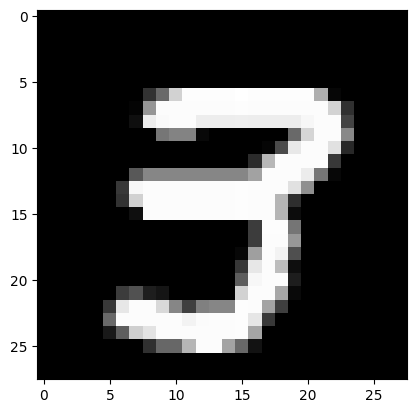

Lable:  1
Prediction:  [8]


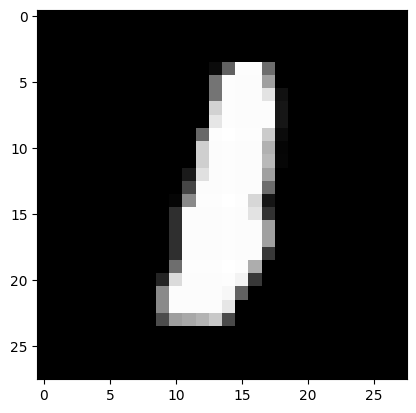

Lable:  6
Prediction:  [6]


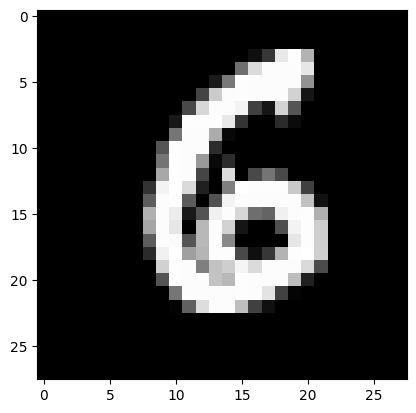

Lable:  4
Prediction:  [4]


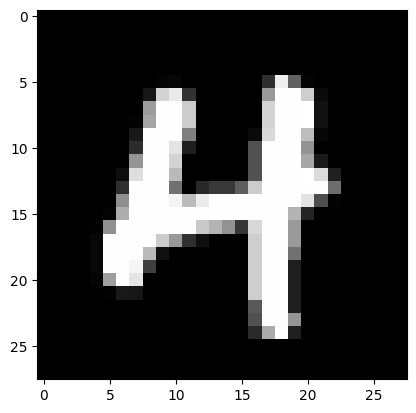

Lable:  5
Prediction:  [5]


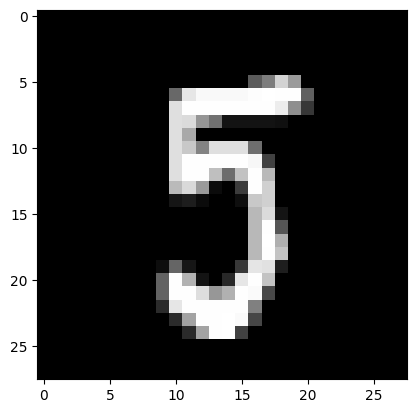

In [22]:
test_preds(0, W1, B1, W2, B2)
test_preds(1, W1, B1, W2, B2)
test_preds(2, W1, B1, W2, B2)
test_preds(3, W1, B1, W2, B2)
test_preds(4, W1, B1, W2, B2)

In [23]:
test_predictions = make_pred(X_test, W1, B1,W2,B2)
acc(test_predictions, y_test)

np.float64(0.8265)

82% Accuracy!